# LFV Higgs decays in SeeSaw model

In this model the couplings that allows LFVHD are given by [Lepton flavor violating Higgs boson decays in seesaw models: New discussions](https://inspirehep.net/files/b569c392f2240d487f9731316b2d5ffc)

| Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|-------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------|
|$Z^\mu  W^{+\nu} W^{-\alpha}$|$-\frac{i e}{t_r}\Gamma^{\mu \nu \alpha}(p_0, p_+, p_-)$|$Z G_{W}^{+} G_{W}^{-}$|$-i e t_L(p_+ - p_-)^\mu$|
|$Z G_{W}^{+} {W}^{-\mu}$|$-i e m_W t_R g^{\mu \nu}$|$Z G_{W}^{-} W^{+\mu}$|$-i e m_W t_R g^{\mu \nu}$|
|$\bar{n}_{i} e_{a} W_{\mu}^{+}$|$\frac{i g}{\sqrt{2}} U_{a i}^{\nu} \gamma^{\mu} P_{L}$|$\overline{e_{a}} n_{j} W_{\mu}^{-}$|$\frac{i g}{\sqrt{2}} U_{a j}^{\nu *} \gamma^{\mu} P_{L}$|
|$\bar{n}_{i} e_{a} G_{W}^{+}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a i}^{\nu}\left(m_{e_{a}} P_{R}-m_{n, i} P_{L}\right)$|$\overline{e_{a}} n_{j} G_{W}^{-}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a j}^{\nu *}\left(m_{e_{a}} P_{L}-m_{n, j} P_{R}\right)$|
|$Z\overline{n_i}n_j$|$\frac{i e}{2 s_W c_W}\gamma^\mu\left(t_L P_L + t_R P_R \right)$|$Z\overline{e_a}e_a$|$i e \gamma^\mu\left(t_L P_L + t_R P_R \right)$|

Because of these interactions 10 diagrams contributes to LFVHD in this model. All of them are summarized in the next table:

|No. |Structure   | $P_0$ | $P_1$ | $P_2$ |
|:------------:|:-------------:|:--------:|:---------:|:----------:|
|1 | SFF| $G_W$ | $\overline{n}_i$ | $n_j$  |
|2 | VFF| $W$ |$\overline{n}_i$ |  $n_j$  |
|3 | FSS| $n_i$  |$G_W$ |  $G_W$  |
|4 | FVS| $n_i$  |$W$ |  $G_W$ |
|5 | FSV| $n_i$  |$G_W$ |  $W$  |
|6 | FVV| $n_i$  |$W$ |  $W$ |
|7 | FV |$n_i$ |$W$ | --- |
|8 | FS|$n_i$  |$G_W$ |  ---  |
|9 | VF |$n_i$  | ---  | $W$ |
|10 | SF |$n_i$  | --- |  $G_W$  |


We will follow 6 main steps to calculates the the form factors to the 10 diagrams, as follows
 1. Define the symbolic variables like $g$, masses, indexes, etc.
 2. Create the vertexes representing each interaction.
 3. Create the Diagrams.
 4. Obtain form factors and the divergencies
 5. Handle the divergencies.

## Define symbolic variables

Importing sympy functions

In [2]:
from sympy import symbols, init_printing, I,pi,IndexedBase,sqrt,simplify, factor, S
init_printing()

**Defining symbolic variables**

In [3]:
g = symbols('g',positive=True)
mW,mG = symbols('m_W,m_G',positive=True)
sW, cW, c2W = symbols('s_W, c_W, c_{2W}')
e = symbols('e')
tr, tL, tR = symbols('t_r, t_L, t_R')


Uν = IndexedBase(r'{{U^\nu}}')
Uνc = IndexedBase(r'{{U^{\nu *}}}')
mn = IndexedBase(r'{{m_n}}')
#me = IndexedBase(r'{{m_e}}')
C = IndexedBase(r'C')
q = IndexedBase(r'q')
Cc = IndexedBase(r'{{C^*}}')
a,b,i,j = symbols('a,b,i,j',integer=True)

**Assigning masses of initial and final particles**

In [4]:
from vertexes import VertexSVpSm, VertexSSpVm, VertexVFF
from vertexes import VertexSFF, VertexVVV, VertexVSS

In [5]:
mZ, ma, mb = symbols('m_Z, m_a, m_b', positive=True)
M0, M1, M2 = symbols('M_0, M_1, M_2', positive=True)
me = {a:ma, b:mb}

## Defining vertexes

$$e = g' \cos{\theta_W} = g \sin{\theta_W}$$

In [6]:
eta = -1
eta_e = 1
etaZ = 1

In [7]:
vertexZWW = VertexVVV(-I*eta*etaZ*g*cW)
vertexZGG = VertexVSS(-I*eta*etaZ*g*((c2W)/(2*cW)))

vertexZWG = VertexSVpSm(-I*etaZ*g*mZ*sW**2)
vertexZGW = VertexSSpVm(-I*etaZ*g*mZ*sW**2)

vertexneWu = lambda i,a: VertexVFF(0,I*g/sqrt(2)*Uν[a,i])
vertexenWd = lambda j,b: VertexVFF(0,I*g/sqrt(2)*Uνc[b,j])

vertexneGu = lambda i,a: VertexSFF((-I*g)/(sqrt(2)*mW)*me[a]*Uν[a,i],
                                    (I*g)/(sqrt(2)*mW)*mn[i]*Uν[a,i])

vertexenGd = lambda j,b: VertexSFF((I*g)/(sqrt(2)*mW)*mn[j]*Uνc[b,j],
                                    (-I*g)/(sqrt(2)*mW)*me[b]*Uνc[b,j])

vertexZnn = lambda i,j: VertexVFF(
    ((I*e)/(2*sW+cW))*(-q[j, i]),
    ((I*e)/(2*sW+cW))*(q[i, j])
)

vertexZee = VertexVFF(
    -I*eta*etaZ*(g/cW)*sW**2,
    -I*eta*etaZ*(g/cW)*(-S(1)/2 + sW**2)
)

In [8]:
vertexZWG.show()

## Create the diagrams

We reproduce the form factor of LFVHD in the seesaw model given in [Lepton flavor violating Higgs boson decays in seesaw models: New discussions](https://inspirehep.net/files/b569c392f2240d487f9731316b2d5ffc)

In [9]:
A = e**2/(2*sW**2*tr) # Favtor to simplify expressions

### Triangles

In [10]:
from Zdecay_diagrams import TriangleFSS, TriangleSFF, TriangleVFF
from Zdecay_diagrams import TriangleFVS, TriangleFVV, TriangleFSV

In [11]:
triangleGninj = TriangleSFF(vertexZnn(i,j),vertexneGu(j,b),vertexenGd(i,a),[mZ, ma, mb, mW,mn[i],mn[j]])

triangleWninj = TriangleVFF(vertexZnn(i,j),vertexneWu(j,b),vertexenWd(i,a),[mZ, ma, mb, mW,mn[i],mn[j]])

triangleniWW = TriangleFVV(vertexZWW,vertexneWu(i,b),vertexenWd(i,a),[mZ, ma, mb, mn[i],mW,mW])

triangleniWG = TriangleFVS(vertexZWG,vertexneGu(i,b),vertexenWd(i,a),[mZ, ma, mb, mn[i],mW,mW])

triangleniGW = TriangleFSV(vertexZGW,vertexneWu(i,b),vertexenGd(i,a),[mZ, ma, mb, mn[i],mW,mW])

triangleniGG = TriangleFSS(vertexZGG,vertexneGu(i,b),vertexenGd(i,a),[mZ, ma, mb, mn[i],mW,mW])

In [12]:
from PaVe2 import D

### Bubbles

In [13]:
from Zdecay_diagrams import BubbleFV, BubbleFS, BubbleSF, BubbleVF

In [14]:
bubbleniW = BubbleFV(vertexZee,vertexneWu(i,b),vertexenWd(i,a),[ma, mb, mn[i],mW])

bubbleWni = BubbleVF(vertexZee,vertexneWu(i,b),vertexenWd(i,a),[ma, mb, mn[i],mW])

bubbleniG = BubbleFS(vertexZee,vertexneGu(i,b),vertexenGd(i,a),[ma, mb, mn[i],mW])

bubbleGni = BubbleSF(vertexZee,vertexneGu(i,b),vertexenGd(i,a),[ma, mb, mn[i],mW])

## Form factors and divergencies

In [15]:
def showFF(lambdaL,lambdaR, omegaL, omegaR,contribution):
    print('*'*100)
    print('*'*100)
    print(f'The form factor LambdaL for contribution {contribution} is given by: \n')
    display(lambdaL)
    print(f'The form factor LambdaR for contribution {contribution} is given by: \n')
    display(lambdaR)
    print('*'*100)
    print('*'*100)
    print(f'The form factor OmegaL for contribution {contribution} is given by: \n')
    display(omegaL)
    print(f'The form factor OmegaR for contribution {contribution} is given by: \n')
    display(omegaR)


In [16]:
from PaVe2 import C0, C1, C2, C00, C11, C12, C22
args = mZ, ma, mb, M0, M1, M2

In [17]:
c0, c1, c2, c00, c11, c12, c22 = symbols('C_0, C_1, C_2, C_{00}, C_{11}, C_{12}, C_{22}')
cambiosCs = lambda M0, M1, M2: {
    C0(mZ, ma, mb, M0, M1, M2):c0,
    C1(mZ, ma, mb, M0, M1, M2):c1,
    C2(mZ, ma, mb, M0, M1, M2):c2,
    C00(mZ, ma, mb, M0, M1, M2):c00,
    C11(mZ, ma, mb, M0, M1, M2):c11,
    C12(mZ, ma, mb, M0, M1, M2):c12,
    C22(mZ, ma, mb, M0, M1, M2):c22,
}

### Triangle Gninj

****************************************************************************************************
****************************************************************************************************
The form factor LambdaL for contribution Gninj is given by: 



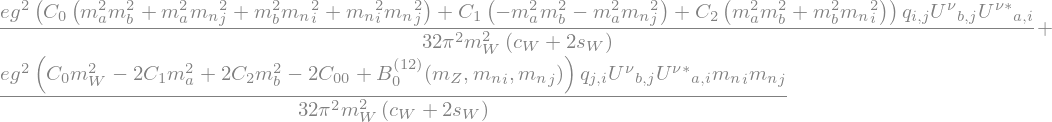

The form factor LambdaR for contribution Gninj is given by: 



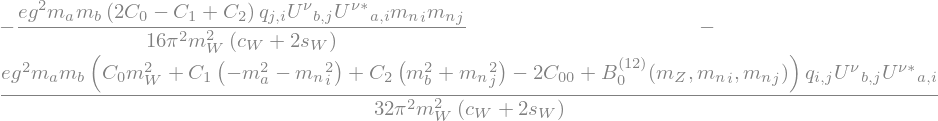

****************************************************************************************************
****************************************************************************************************
The form factor OmegaL for contribution Gninj is given by: 



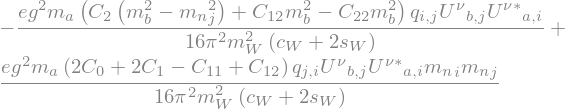

The form factor OmegaR for contribution Gninj is given by: 



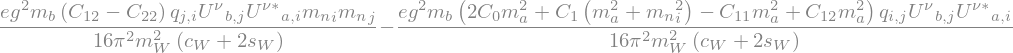

In [18]:
lambdaL1 = (-triangleGninj.LambdaL()).expand().subs(cambiosCs(mW, mn[i], mn[j])).collect(
    [q[i, j], q[j, i]],factor
    ).collect([c0, c1, c2])

lambdaR1 = (-triangleGninj.LambdaR()).expand().subs(cambiosCs(mW, mn[i], mn[j])).collect(
    [q[i, j], q[j, i]],factor
    ).collect([c0, c1, c2])
omegaL1 = (-triangleGninj.OmegaL()).expand().subs(cambiosCs(mW, mn[i], mn[j])).collect(
    [q[i, j], q[j, i]],factor
    ).collect([c0, c1, c2, c11, c12, c22])

omegaR1 = (-triangleGninj.OmegaR()).expand().subs(cambiosCs(mW, mn[i], mn[j])).collect(
    [q[i, j], q[j, i]],factor
    ).collect([c0, c1, c2, c11, c12, c22])
showFF(lambdaL1, lambdaR1, omegaL1, omegaR1,'Gninj')

The divergent term of the contribution Gninj is given by

In [19]:
from PaVe2 import pave_descomposition, Δe

The left divergent term of contribution Gninj is given by: 



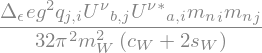

The right divergent term of contribution Gninj is given by: 



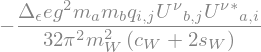

In [20]:
DivlambdaL1 = pave_descomposition(lambdaL1).expand().collect(Δe, evaluate=False)[Δe].simplify()*Δe

DivlambdaR1 = pave_descomposition(lambdaR1).expand().collect(Δe, evaluate=False)[Δe].simplify()*Δe




print('The left divergent term of contribution Gninj is given by: \n')
display(DivlambdaL1)
# print('*'*100)
# print('*'*100)
print('The right divergent term of contribution Gninj is given by: \n')
display(DivlambdaR1)

The form factor $\Omega_{L, R}\left(G n_i n_j \right) = 0$

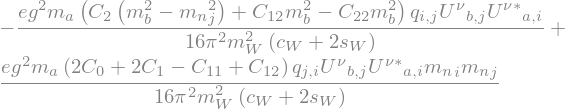

In [21]:
DivomegaL1 = pave_descomposition(omegaL1)#.expand().collect(Δe, evaluate=False)[Δe].simplify()*Δe

DivomegaR1 = pave_descomposition(omegaR1)#.expand().collect(Δe, evaluate=False)[Δe].simplify()*Δe

DivomegaL1

### Triangle Wninj

****************************************************************************************************
****************************************************************************************************
The form factor LambdaL for contribution Gninj is given by: 



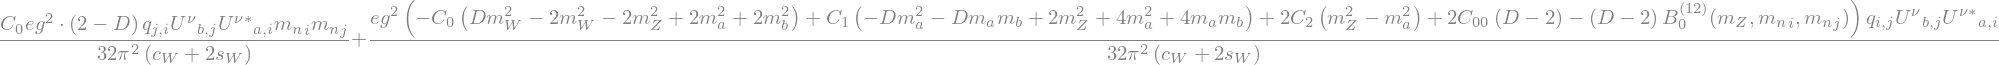

The form factor LambdaR for contribution Gninj is given by: 



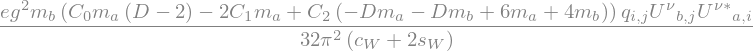

****************************************************************************************************
****************************************************************************************************
The form factor OmegaL for contribution Gninj is given by: 



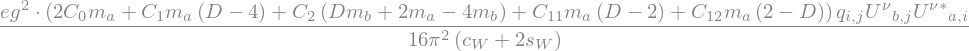

The form factor OmegaR for contribution Gninj is given by: 



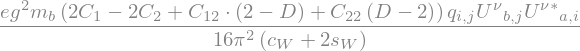

In [22]:
lambdaL2 = (-triangleWninj.LambdaL()).expand().subs(cambiosCs(mW, mn[i], mn[j])).collect(
    [q[i, j], q[j, i]],factor
    ).collect([c0, c1, c2, c00], simplify)


lambdaR2 = (-triangleWninj.LambdaR()).expand().subs(cambiosCs(mW, mn[i], mn[j])).collect(
    [q[i, j], q[j, i]],factor
    ).collect([c0, c1, c2, c00], simplify)

omegaL2 = (-triangleWninj.OmegaL()).expand().subs(cambiosCs(mW, mn[i], mn[j])).collect(
    [q[i, j], q[j, i]],factor
    ).collect([c0, c1, c2, c11, c12, c22], simplify)


omegaR2 = (-triangleWninj.OmegaR()).expand().subs(cambiosCs(mW, mn[i], mn[j])).collect(
    [q[i, j], q[j, i]],factor
    ).collect([c0, c1, c2, c11, c12, c22], simplify)

showFF(lambdaL2, lambdaR2, omegaL2, omegaR2,'Gninj')

### Triangle niWW

**Left form factor**

****************************************************************************************************
****************************************************************************************************
The form factor LambdaL for contribution niWW is given by: 



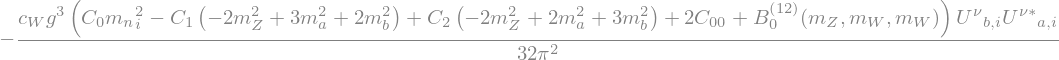

The form factor LambdaR for contribution niWW is given by: 



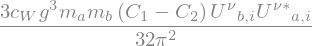

****************************************************************************************************
****************************************************************************************************
The form factor OmegaL for contribution niWW is given by: 



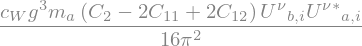

The form factor OmegaR for contribution niWW is given by: 



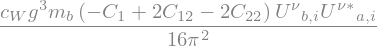

In [23]:
lambdaL3 = (-triangleniWW.LambdaL().subs(cambiosCs(mn[i], mW, mW)).subs(D, 4)).simplify()
lambdaR3 = (-triangleniWW.LambdaR().subs(cambiosCs(mn[i], mW, mW)).subs(D, 4)).simplify()
omegaL3 = (-triangleniWW.OmegaL().subs(cambiosCs(mn[i], mW, mW)).subs(D, 4)).simplify()
omegaR3 = (-triangleniWW.OmegaR().subs(cambiosCs(mn[i], mW, mW)).subs(D, 4)).simplify()

showFF(lambdaL3,lambdaR3, omegaL3, omegaR3,'niWW')

### Triangle niWG

****************************************************************************************************
****************************************************************************************************
The form factor LambdaL for contribution niWG is given by: 



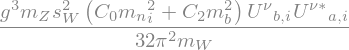

The form factor LambdaR for contribution niWG is given by: 



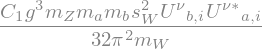

****************************************************************************************************
****************************************************************************************************
The form factor OmegaL for contribution niWG is given by: 



The form factor OmegaR for contribution niWG is given by: 



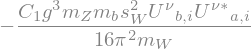

In [24]:
lambdaL4 = (-triangleniWG.LambdaL()).subs(cambiosCs(mn[i], mW, mW)).subs(D, 4).simplify()

lambdaR4 = (-triangleniWG.LambdaR()).subs(cambiosCs(mn[i], mW, mW)).subs(D, 4).simplify()

omegaL4 = (-triangleniWG.OmegaL()).subs(cambiosCs(mn[i], mW, mW)).subs(D, 4).simplify()

omegaR4 = (-triangleniWG.OmegaR()).subs(cambiosCs(mn[i], mW, mW)).subs(D, 4).simplify()

showFF(lambdaL4, lambdaR4, omegaL4, omegaR4,'niWG')

### Triangle niGW

****************************************************************************************************
****************************************************************************************************
The form factor LambdaL for contribution niGW is given by: 



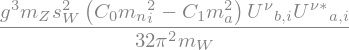

The form factor LambdaR for contribution niGW is given by: 



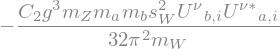

****************************************************************************************************
****************************************************************************************************
The form factor OmegaL for contribution niGW is given by: 



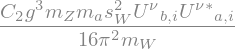

The form factor OmegaR for contribution niGW is given by: 



In [25]:
lambdaL5 = (-triangleniGW.LambdaL()).subs(cambiosCs(mn[i], mW, mW)).subs(D, 4).simplify()
lambdaR5 = (-triangleniGW.LambdaR()).subs(cambiosCs(mn[i], mW, mW)).subs(D, 4).simplify()

omegaL5 = (-triangleniGW.OmegaL()).subs(cambiosCs(mn[i], mW, mW)).subs(D, 4).simplify()
omegaR5 = (-triangleniGW.OmegaR()).subs(cambiosCs(mn[i], mW, mW)).subs(D, 4).simplify()

showFF(lambdaL5,lambdaR5, omegaL5, omegaR5,'niGW')

### Triangle niGG

****************************************************************************************************
****************************************************************************************************
The form factor LambdaL for contribution niGG is given by: 



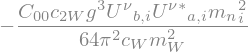

The form factor LambdaR for contribution niGG is given by: 



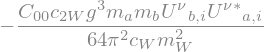

****************************************************************************************************
****************************************************************************************************
The form factor OmegaL for contribution niGG is given by: 



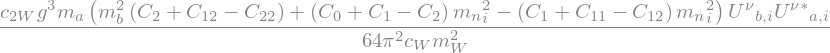

The form factor OmegaR for contribution niGG is given by: 



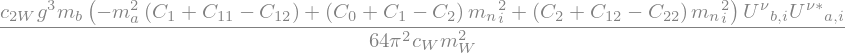

In [26]:
lambdaL6 = (-triangleniGG.LambdaL()).subs(cambiosCs(mn[i], mW, mW)).subs(D, 4).simplify()

lambdaR6 = (-triangleniGG.LambdaR()).subs(cambiosCs(mn[i], mW, mW)).subs(D, 4).simplify()

omegaL6 = (-triangleniGG.OmegaL()).subs(cambiosCs(mn[i], mW, mW)).subs(D, 4).simplify()

omegaR6 = (-triangleniGG.OmegaR()).subs(cambiosCs(mn[i], mW, mW)).subs(D, 4).simplify()


showFF(lambdaL6, lambdaR6, omegaL6, omegaR6,'niGG')

### Bubbles niW and Wni

**Left form factor**

In [55]:
from formfactors import OneFermionLoopBubbleFX
from Zboson.functionsFV import IFV
from Zboson.functionsVF import IVF

In [ ]:
ff_niW = OneFermionLoopBubbleFX()

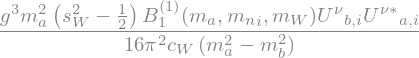

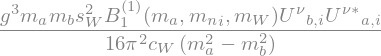

In [27]:
lambdaL7 = (-bubbleniW.LambdaL()).subs(D,4)

lambdaR7 = (-bubbleniW.LambdaR()).subs(D,4)

display(lambdaL7, lambdaR7)

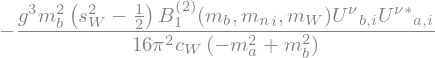

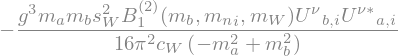

In [28]:
lambdaL9 = (-bubbleWni.LambdaL()).subs(D, 4)
lambdaR9 = (-bubbleWni.LambdaR()).subs(D, 4)

display(lambdaL9, lambdaR9)

#### Adding bubble niW y Wni

In [29]:
BniW_L =  (bubbleniW.LambdaL() + bubbleWni.LambdaL()).subs(D,4).simplify()
BniW_R =  (bubbleniW.LambdaR() + bubbleWni.LambdaR()).subs(D,4).simplify()
# BniW_L

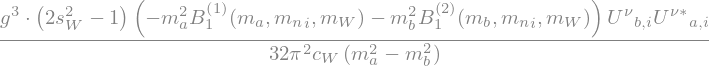

In [30]:
BniW_L

When we add the contributions niW and Wni, we can split up the PV function in terms of finite and divergent parts. However , all the divergencies cancel each other and does not appear in the thi total form factors.

In [31]:
from PaVe2 import pave_descomposition, Δe, get_pave_functions

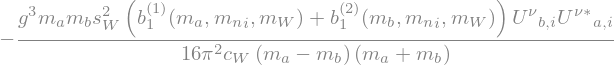

In [32]:
pave_descomposition(BniW_R).expand().collect(Δe, factor)

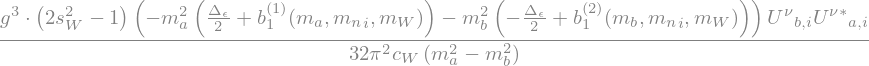

In [56]:
pave_descomposition(BniW_L)

In [43]:
BniW_div = pave_descomposition(BniW_L).expand().collect(Δe, factor, evaluate=False)[Δe]

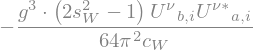

In [44]:
BniW_div

### Bubbles niG and Gni

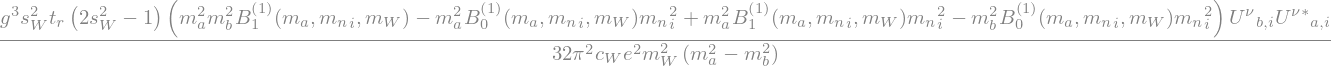

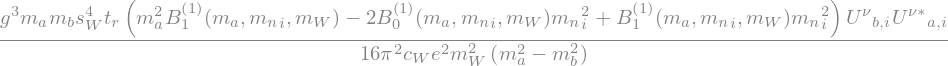

In [45]:
lambdaL8 = (-bubbleniG.LambdaL()/A).simplify()

lambdaR8 = (-bubbleniG.LambdaR()/A).simplify()

display(lambdaL8, lambdaR8)

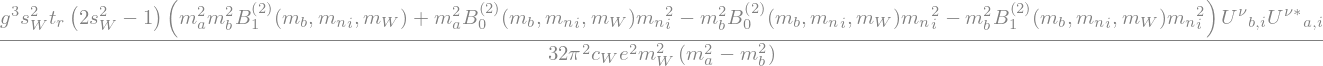

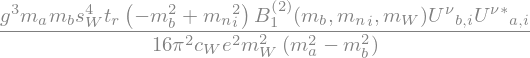

In [46]:
lambdaL10 = (-bubbleGni.LambdaL()/A).simplify()


lambdaR10 = (-bubbleGni.LambdaR()/A).simplify()

display(lambdaL10, lambdaR10)

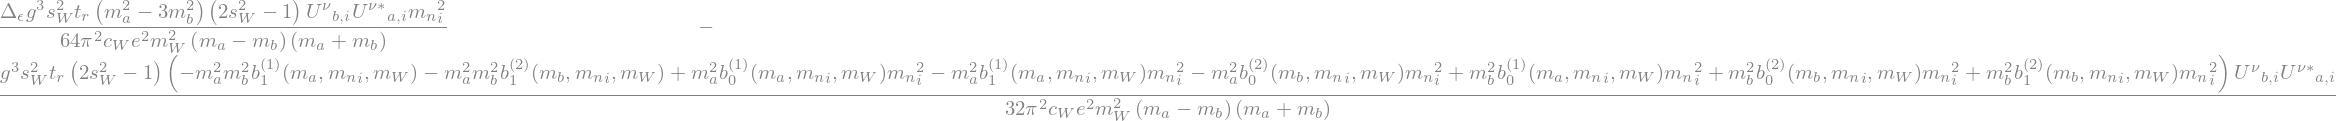

In [48]:
pave_descomposition(lambdaL10 + lambdaL8).expand().collect(Δe, factor)

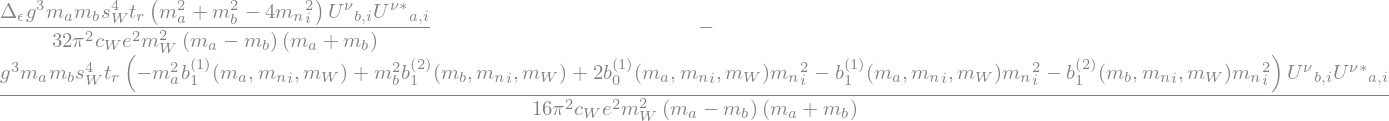

In [49]:
pave_descomposition(lambdaR10 + lambdaR8).expand().collect(Δe, factor)

## Handle the divergencies

In contrast to the case of bubbles niW and Wni when we add form factors of bubbles niG and Gni the divergencies continues as we show as follows:

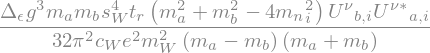

In [51]:
DivniG = (pave_descomposition(lambdaR10 + lambdaR8).expand(
    ).collect(Δe, factor,evaluate=False)[Δe]*Δe
    )
DivniG

To other side the divergent term of the right form factor to triangle Gninj is given by

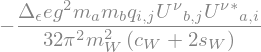

In [53]:
DivlambdaR1

Although, it is not exolicit in this case we have a soble summation on the neutrino indexes i and j the we can demostrate follows [Lepton flavor violating Higgs boson decays in seesaw models: New discussions](https://inspirehep.net/files/b569c392f2240d487f9731316b2d5ffc), that 

\begin{align}\notag
Div\left[A_R^{(1)}\right]& = {m}_{b}\sum_{i,j = 1}^{K+3}   \left[\Delta_\epsilon m_{n_i}^{2} {{{C}}}_{ij} + \Delta_\epsilon  m_{n_i} m_{n_j}{C^*}_{ij} 
\right] \Delta_{ij}^{ab}\\ \notag
& = {m}_{b}\sum_{i,j = 1}^{K+3}   \left[ \Delta_\epsilon m_{n_i}^{2} {{{C}}}_{ij}\right] \Delta_{ij}^{ab}
\end{align}

To other side
\begin{align}\notag
\sum_{i,j = 1}^{6}  m_{n_{i}}^2{C}_{ij} \Delta_{ij}^{ab} &= \frac{g^{3}}{64 \pi^{2} m_{W}^{3}}\sum_{i,j = 1}^{6}\sum_{c=1}^{3} m_{n_{i}}^2U_{ci}^{\nu} U_{cj}^{\nu *} U_{bj}^{\nu} U_{ai}^{\nu *}\\ \notag
& = \frac{g^{3}}{64 \pi^{2} m_{W}^{3}}\sum_{i = 1}^{6}\sum_{c=1}^{3} m_{n_{i}}^2 U_{ci}^{\nu} U_{ai}^{\nu *}\sum_{j = 1}^{6}U_{bj}^{\nu}U_{cj}^{\nu *}\\ \notag
& = \frac{g^{3}}{64 \pi^{2} m_{W}^{3}}\sum_{i = 1}^{6}\sum_{c=1}^{3} m_{n_{i}}^2 U_{ci}^{\nu} U_{ai}^{\nu *}(U^{\nu}U^{\nu \dagger})_{bc}\\\label{ec:id-mni2}
& = \sum_{i = 1}^{K+3}m_{n_{i}}^2 \Delta_{ii}^{ab}
\end{align}

Then, the divergent term of $A_R^{(1)}$ is given by 
\begin{align}\notag
Div\left[A_R^{(1)}\right] &= {m}_{b}\Delta_\epsilon\sum_{i = 1}^{6}  m_{n_i}^{2} \Delta_{ii}^{ab}
\end{align}

In our code that is equivalent to do the next substitutions (in a practical way):

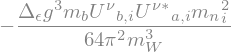

In [ ]:
DivR1 = (DivR1*A).expand().subs(C[i,j],0).subs(cambios).subs({Cc[i,j]:1,Uν[b,j]:Uν[b,i],mn[j]:mn[i]})
DivR1

Then, the divergencies of bubbles niG and Gni are canceled with the divergencie of triangle Gninj.

In [ ]:
(DivniG + DivR1).simplify()